In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
features = iris.data

features[:, 0] *= 10000
data = pd.DataFrame(features, columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,51000.0,3.5,1.4,0.2
1,49000.0,3.0,1.4,0.2
2,47000.0,3.2,1.3,0.2
3,46000.0,3.1,1.5,0.2
4,50000.0,3.6,1.4,0.2


In [3]:
y = iris.target
X = data.iloc[:, [0, 2]]

X.shape, y.shape

((150, 2), (150,))

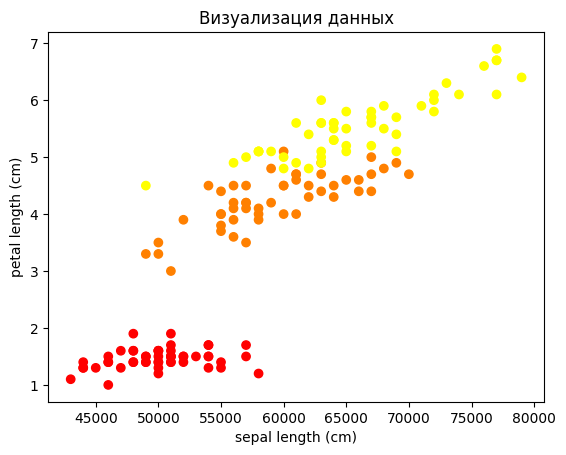

In [4]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.title("Визуализация данных")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=25, weights='distance')
knn.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=25, weights='distance')

In [6]:
y_pred = knn.predict(X_scaled)

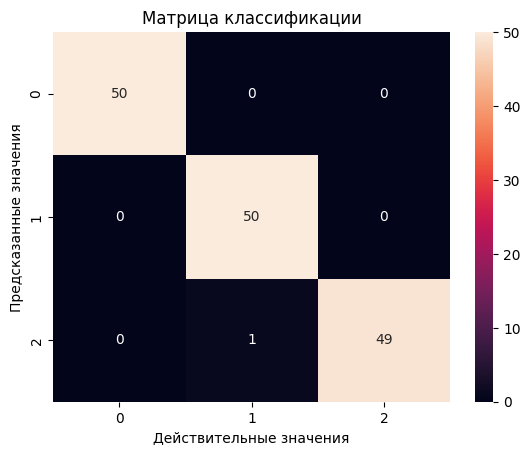

In [7]:

from sklearn.metrics import confusion_matrix, classification_report
plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt="d")
plt.xlabel("Действительные значения")
plt.ylabel("Предсказанные значения")
plt.show()

In [8]:
print(classification_report(y_pred, y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        51
           2       0.98      1.00      0.99        49

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



c:\Users\Lev\Desktop\ml\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


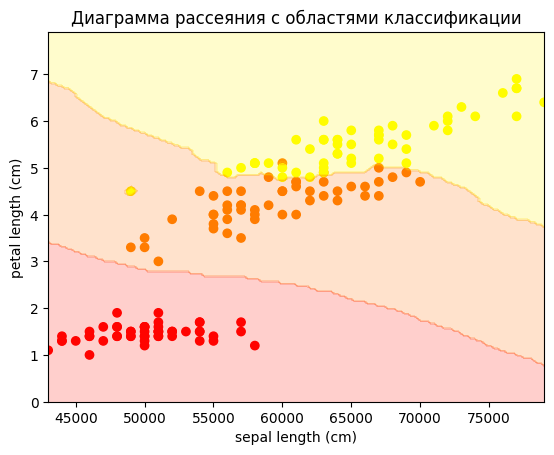

In [9]:
X0 = np.linspace(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)
XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, alpha=0.2, cmap='autumn')

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

In [10]:
observation_new = [[55000, 2.5]]
observation_new_scaled = scaler.transform(observation_new)
knn.predict_proba(observation_new_scaled)

c:\Users\Lev\Desktop\ml\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.7993111, 0.2006889, 0.       ]])

In [11]:
distances, indices = knn.kneighbors(observation_new_scaled)
indices

array([[20,  5, 98, 18, 44, 10, 31, 23, 79, 15, 48, 33, 64, 46, 27, 32,
        93, 21, 19, 39, 36, 81, 28, 16, 43]], dtype=int64)

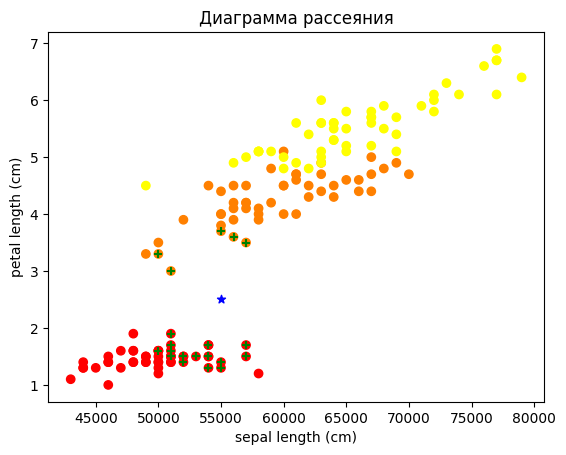

In [12]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b')

for i in range(len(indices[0])):
    plt.scatter(X.iloc[indices[0][i], 0], X.iloc[indices[0][i], 1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()